Copyright (c) 2021 [윤기태]

https://github.com/yoonkt200/learning-spoons-nano-degree

[MIT License](https://github.com/yoonkt200/learning-spoons-nano-degree/blob/master/LICENSE.txt)

# LearningSpoons - NanoDegree

-----

# 5회차 - (판매자향 데이터 분석)

- [1. 주문데이터 전처리](#1.-주문데이터-전처리)
    - [데이터 병합 및 탐색]
    - [데이터 전처리]
- [2. 판매자 주문데이터 분석](#2.-판매자-주문데이터-분석)
    - [seller별 판매 분석]
    - [seller별 배송 분석]
    - [seller 군집 분석]
- [3. 분석 결과 함수화 & 대시보드](#3.-분석-결과-함수화-&-대시보드)
    - [판매량 파이차트]
    - [상품별 리뷰 워드클라우드]
----

In [1]:
# pip install sklearn bokeh qgrid googletrans==4.0.0-rc1 pytagcloud pygame simplejson nltk

In [2]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_dir = "../dataset/"

# 1. 주문데이터 전처리

### [데이터 병합 및 탐색]

----
#### *주문데이터 기준으로 데이터 병합*

In [4]:
order_df = pd.read_csv(data_dir + "olist_order_items_dataset.csv")
shipping_df = pd.read_csv(data_dir + "olist_orders_dataset.csv")
category_df = pd.read_csv(data_dir + "olist_products_dataset.csv")
user_df = pd.read_csv(data_dir + "olist_customers_dataset.csv")
location_df = pd.read_csv(data_dir + "olist_geolocation_dataset.csv")
product_category_name_translation_df = pd.read_csv(data_dir + "product_category_name_translation.csv")
payments_dataset = pd.read_csv(data_dir + "olist_order_payments_dataset.csv")

In [5]:
order_df['order_id'] = order_df['order_id'].astype(str)
shipping_df['order_id'] = shipping_df['order_id'].astype(str)
order_df = order_df.merge(shipping_df, how='left', on='order_id')

In [6]:
order_df['product_id'] = order_df['product_id'].astype(str)
category_df['product_id'] = category_df['product_id'].astype(str)
order_df = order_df.merge(category_df, how='left', on='product_id')

In [7]:
order_df['customer_id'] = order_df['customer_id'].astype(str)
user_df['customer_id'] = user_df['customer_id'].astype(str)
order_df = order_df.merge(user_df, how='left', on='customer_id')

In [8]:
order_df['customer_zip_code_prefix'] = order_df['customer_zip_code_prefix'].astype(str)
location_df['geolocation_zip_code_prefix'] = location_df['geolocation_zip_code_prefix'].astype(str)
location_df.columns = ['customer_zip_code_prefix', 'lat', 'lng', 'city', 'state']
location_df = location_df.groupby('customer_zip_code_prefix').agg({'lat': 'mean', 'lng': 'mean', 'city': 'first', 'state': 'first'}).reset_index()
order_df = order_df.merge(location_df, how='left', on='customer_zip_code_prefix')

In [9]:
order_df['product_category_name'] = order_df['product_category_name'].astype(str)
product_category_name_translation_df['product_category_name'] = product_category_name_translation_df['product_category_name'].astype(str)
order_df = order_df.merge(product_category_name_translation_df, how='left', on='product_category_name')

In [10]:
payments_dataset['order_id'] = payments_dataset['order_id'].astype(str)
order_df = order_df.merge(payments_dataset, how='left', on='order_id')

In [11]:
order_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,customer_state,lat,lng,city,state,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,RJ,-21.762775,-41.309633,campos dos goytacazes,RJ,cool_stuff,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,SP,-20.220527,-50.903424,santa fe do sul,SP,pet_shop,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,MG,-19.870305,-44.593326,pará de minas,MG,furniture_decor,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,SP,-23.089925,-46.611654,atibaia,SP,perfumery,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,SP,-23.243402,-46.827614,varzea paulista,SP,garden_tools,1.0,credit_card,3.0,218.04


In [12]:
anal_columns = ['order_id', 'product_id', 'customer_id', 'customer_unique_id', 'seller_id',
                'order_item_id', 'price', 'freight_value', 
                'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_customer_date', 'order_estimated_delivery_date',
                'product_category_name_english',
                'city', 'state',
                'payment_value'
                ]

In [13]:
order_df = order_df[anal_columns]
order_df.head()

,order_id,product_id,customer_id,customer_unique_id,seller_id,order_item_id,price,freight_value,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,product_category_name_english,city,state,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,48436dade18ac8b2bce089ec2a041202,1,58.90,13.29,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-20 23:43:48,2017-09-29 00:00:00,cool_stuff,campos dos goytacazes,RJ,72.19
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,dd7ddc04e1b6c2c614352b383efe2d36,1,239.90,19.93,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-12 16:04:24,2017-05-15 00:00:00,pet_shop,santa fe do sul,SP,259.83
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,5b51032eddd242adc84c38acab88f23d,1,199.00,17.87,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-22 13:19:16,2018-02-05 00:00:00,furniture_decor,pará de minas,MG,216.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,9d7a1d34a5052409006425275ba1c2b4,1,12.99,12.79,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-14 13:32:39,2018-08-20 00:00:00,perfumery,atibaia,SP,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,df560393f3a51e74553ab94004ba5c87,1,199.90,18.14,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-03-01 16:42:31,2017-03-17 00:00:00,garden_tools,varzea paulista,SP,218.04


In [14]:
olist_sellers_dataset = pd.read_csv(data_dir + "olist_sellers_dataset.csv")
olist_sellers_dataset.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [15]:
order_df['seller_id'] = order_df['seller_id'].astype(str)
olist_sellers_dataset['seller_id'] = olist_sellers_dataset['seller_id'].astype(str)
order_df = order_df.merge(olist_sellers_dataset, how='left', on='seller_id')
order_df.columns

Index(['order_id', 'product_id', 'customer_id', 'customer_unique_id',
       'seller_id', 'order_item_id', 'price', 'freight_value', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'product_category_name_english', 'city', 'state', 'payment_value',
       'seller_zip_code_prefix', 'seller_city', 'seller_state'],
      dtype='object')

In [16]:
order_df.shape

(117604, 20)

In [17]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117604 entries, 0 to 117603
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117604 non-null  object 
 1   product_id                     117604 non-null  object 
 2   customer_id                    117604 non-null  object 
 3   customer_unique_id             117604 non-null  object 
 4   seller_id                      117604 non-null  object 
 5   order_item_id                  117604 non-null  int64  
 6   price                          117604 non-null  float64
 7   freight_value                  117604 non-null  float64
 8   order_status                   117604 non-null  object 
 9   order_purchase_timestamp       117604 non-null  object 
 10  order_approved_at              117589 non-null  object 
 11  order_delivered_customer_date  115037 non-null  object 
 12  order_estimated_delivery_date 

In [18]:
order_df.isnull().sum()

order_id                            0
product_id                          0
customer_id                         0
customer_unique_id                  0
seller_id                           0
order_item_id                       0
price                               0
freight_value                       0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_customer_date    2567
order_estimated_delivery_date       0
product_category_name_english    1723
city                              312
state                             312
payment_value                       3
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
dtype: int64

----
#### *데이터 전처리*

In [19]:
order_df['order_purchase_timestamp'] = pd.to_datetime(order_df['order_purchase_timestamp'])
order_df['order_approved_at'] = pd.to_datetime(order_df['order_approved_at'])
order_df['order_delivered_customer_date'] = pd.to_datetime(order_df['order_delivered_customer_date'])
order_df['order_estimated_delivery_date'] = pd.to_datetime(order_df['order_estimated_delivery_date'])
order_df = order_df[order_df['order_status']=='delivered']
order_df = order_df.dropna()

----
# 2. 판매자 주문데이터 분석
### [seller별 판매 분석]

----
#### *Top Seller EDA*

In [20]:
order_df['seller_id'].nunique()

2912

In [21]:
# 판매 물품 갯수
seller_count_df = order_df.groupby('seller_id')['order_id'].count().reset_index()

In [22]:
len(order_df['order_id'].unique()) / seller_count_df['seller_id'].nunique()

32.57074175824176

array([[<AxesSubplot:title={'center':'order_id'}>]], dtype=object)

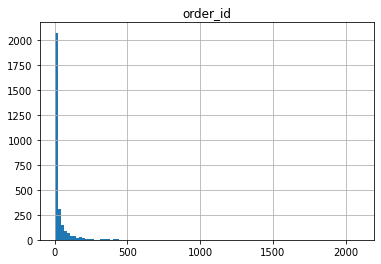

In [23]:
seller_count_df.hist(bins=100)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f831a0a41c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f831a0a4820>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f82c815bd30>],
 'medians': [<matplotlib.lines.Line2D at 0x7f831a0a4f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f831a091310>],
 'means': []}

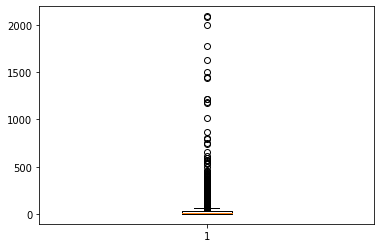

In [24]:
plt.boxplot(seller_count_df['order_id'])

In [25]:
seller_count_df['order_id'].describe()

count    2912.000000
mean       38.828640
std       125.350492
min         1.000000
25%         2.000000
50%         8.000000
75%        27.000000
max      2092.000000
Name: order_id, dtype: float64

In [26]:
seller_count_df[seller_count_df['order_id']>27].shape

(723, 2)

In [27]:
# 28개 이상 판매한 seller id list
top_sellers = seller_count_df[seller_count_df['order_id']>27]['seller_id'].tolist()

In [28]:
order_df.shape

(113069, 20)

In [29]:
# 전체 거래 데이터 중, top seller의 거래 데이터
order_df[order_df['seller_id'].isin(top_sellers)].shape

(97506, 20)

In [30]:
# 상위 seller들의 전체 거래에서의 비중
order_df[order_df['seller_id'].isin(top_sellers)].shape[0] / order_df.shape[0]

0.8623583829343144

In [31]:
# 판매한 물건, 카테고리 종류
seller_distinct_df = order_df.groupby('seller_id')[['product_id', 'product_category_name_english']].agg({'product_id': pd.Series.nunique, 'product_category_name_english': pd.Series.nunique}).reset_index()
seller_distinct_df.head()

,seller_id,product_id,product_category_name_english
0,0015a82c2db000af6aaaf3ae2ecb0532,1,1
1,001cca7ae9ae17fb1caed9dfb1094831,11,2
2,002100f778ceb8431b7a1020ff7ab48f,24,1
3,004c9cd9d87a3c30c522c48c4fc07416,77,1
4,00720abe85ba0859807595bbf045a33b,9,1


----
#### *Popular Item for Seller*

In [32]:
from collections import Counter

In [33]:
seller_product_df = order_df.groupby('seller_id')['product_id'].apply(list).reset_index()

In [34]:
seller_product_df.head()

,seller_id,product_id
0,0015a82c2db000af6aaaf3ae2ecb0532,"[a2ff5a97bf95719e38ea2e3b4105bce8, a2ff5a97bf9..."
1,001cca7ae9ae17fb1caed9dfb1094831,"[08574b074924071f4e201e151b152b4e, 4f3b83b83f7..."
2,002100f778ceb8431b7a1020ff7ab48f,"[62c2b9bd44500d0305b1e50e2c9bd34d, cb790fa02cc..."
3,004c9cd9d87a3c30c522c48c4fc07416,"[b2d98b6f547c14e29a9e72b8e630d936, daf9301b3e3..."
4,00720abe85ba0859807595bbf045a33b,"[2d9ff06c8870a518f5f6909774e140fb, 2d9ff06c887..."


In [35]:
seller_product_df['sell_count_dict'] = seller_product_df['product_id'].apply(lambda x: Counter(x))

In [36]:
seller_product_df.head()

,seller_id,product_id,sell_count_dict
0,0015a82c2db000af6aaaf3ae2ecb0532,"[a2ff5a97bf95719e38ea2e3b4105bce8, a2ff5a97bf9...",{'a2ff5a97bf95719e38ea2e3b4105bce8': 3}
1,001cca7ae9ae17fb1caed9dfb1094831,"[08574b074924071f4e201e151b152b4e, 4f3b83b83f7...","{'08574b074924071f4e201e151b152b4e': 112, '4f3..."
2,002100f778ceb8431b7a1020ff7ab48f,"[62c2b9bd44500d0305b1e50e2c9bd34d, cb790fa02cc...","{'62c2b9bd44500d0305b1e50e2c9bd34d': 1, 'cb790..."
3,004c9cd9d87a3c30c522c48c4fc07416,"[b2d98b6f547c14e29a9e72b8e630d936, daf9301b3e3...","{'b2d98b6f547c14e29a9e72b8e630d936': 7, 'daf93..."
4,00720abe85ba0859807595bbf045a33b,"[2d9ff06c8870a518f5f6909774e140fb, 2d9ff06c887...","{'2d9ff06c8870a518f5f6909774e140fb': 2, 'cb046..."


In [37]:
seller_product_df['best_selling_product'] = seller_product_df['sell_count_dict'].apply(lambda x: x.most_common(3))

In [38]:
seller_product_df.head()

,seller_id,product_id,sell_count_dict,best_selling_product
0,0015a82c2db000af6aaaf3ae2ecb0532,"[a2ff5a97bf95719e38ea2e3b4105bce8, a2ff5a97bf9...",{'a2ff5a97bf95719e38ea2e3b4105bce8': 3},"[(a2ff5a97bf95719e38ea2e3b4105bce8, 3)]"
1,001cca7ae9ae17fb1caed9dfb1094831,"[08574b074924071f4e201e151b152b4e, 4f3b83b83f7...","{'08574b074924071f4e201e151b152b4e': 112, '4f3...","[(08574b074924071f4e201e151b152b4e, 112), (e25..."
2,002100f778ceb8431b7a1020ff7ab48f,"[62c2b9bd44500d0305b1e50e2c9bd34d, cb790fa02cc...","{'62c2b9bd44500d0305b1e50e2c9bd34d': 1, 'cb790...","[(158102fe543dbaeb84d87811bfe06d0d, 16), (414c..."
3,004c9cd9d87a3c30c522c48c4fc07416,"[b2d98b6f547c14e29a9e72b8e630d936, daf9301b3e3...","{'b2d98b6f547c14e29a9e72b8e630d936': 7, 'daf93...","[(54af11c815f92135fb554bd9c97dd418, 13), (b2d9..."
4,00720abe85ba0859807595bbf045a33b,"[2d9ff06c8870a518f5f6909774e140fb, 2d9ff06c887...","{'2d9ff06c8870a518f5f6909774e140fb': 2, 'cb046...","[(0e14941c183946f60e3b86585d05f984, 5), (ae253..."


----
#### *Popular Category for Seller*

In [39]:
seller_category_df = order_df.groupby('seller_id')['product_category_name_english'].apply(list).reset_index()

In [40]:
seller_category_df['sell_count_dict'] = seller_category_df['product_category_name_english'].apply(lambda x: Counter(x))

In [41]:
seller_category_df['best_selling_category'] = seller_category_df['sell_count_dict'].apply(lambda x: x.most_common(3))

In [42]:
seller_category_df.head()

,seller_id,product_category_name_english,sell_count_dict,best_selling_category
0,0015a82c2db000af6aaaf3ae2ecb0532,"[small_appliances, small_appliances, small_app...",{'small_appliances': 3},"[(small_appliances, 3)]"
1,001cca7ae9ae17fb1caed9dfb1094831,"[garden_tools, garden_tools, garden_tools, gar...","{'garden_tools': 209, 'construction_tools_cons...","[(garden_tools, 209), (construction_tools_cons..."
2,002100f778ceb8431b7a1020ff7ab48f,"[furniture_decor, furniture_decor, furniture_d...",{'furniture_decor': 57},"[(furniture_decor, 57)]"
3,004c9cd9d87a3c30c522c48c4fc07416,"[bed_bath_table, bed_bath_table, bed_bath_tabl...",{'bed_bath_table': 160},"[(bed_bath_table, 160)]"
4,00720abe85ba0859807595bbf045a33b,"[housewares, housewares, housewares, houseware...",{'housewares': 26},"[(housewares, 26)]"


----
#### *Price Statistic for Seller*
- 평균 배송비
- 평균 카테고리 상대가격
- 총 결제액


<AxesSubplot:>

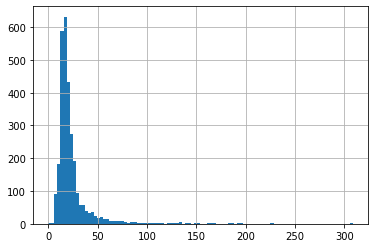

In [43]:
order_df.groupby('seller_id')['freight_value'].mean().hist(bins=100)

<AxesSubplot:>

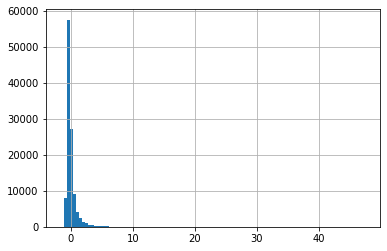

In [44]:
order_df['z_score_in_category'] = order_df.groupby('product_category_name_english')['price'].transform(lambda x: (x - x.mean()) / x.std())
order_df['z_score_in_category'].hist(bins=100)

In [45]:
seller_statistic_df = order_df.groupby('seller_id')[['freight_value', 'z_score_in_category', 'payment_value']].agg({'freight_value': 'mean', 'z_score_in_category': 'mean', 'payment_value': 'sum'})

In [46]:
seller_statistic_df = seller_statistic_df.reset_index()
seller_statistic_df.head()

,seller_id,freight_value,z_score_in_category,payment_value
0,0015a82c2db000af6aaaf3ae2ecb0532,21.020000,1.235366,2748.06
1,001cca7ae9ae17fb1caed9dfb1094831,36.983814,-0.047328,47557.95
2,002100f778ceb8431b7a1020ff7ab48f,14.217895,-0.731393,2412.64
3,004c9cd9d87a3c30c522c48c4fc07416,19.222062,0.259749,24736.25
4,00720abe85ba0859807595bbf045a33b,12.153077,-0.368756,3118.40


array([[<AxesSubplot:title={'center':'freight_value'}>,
        <AxesSubplot:title={'center':'z_score_in_category'}>],
       [<AxesSubplot:title={'center':'payment_value'}>, <AxesSubplot:>]],
      dtype=object)

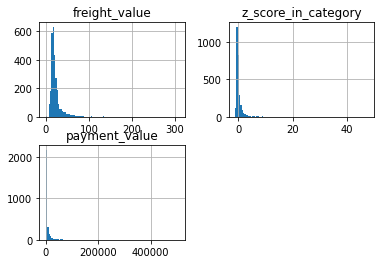

In [47]:
seller_statistic_df.hist(bins=100)

<AxesSubplot:>

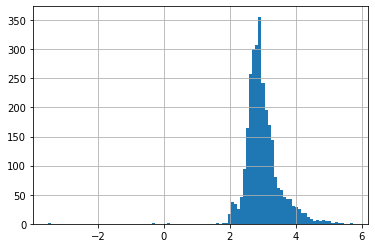

In [48]:
np.log(seller_statistic_df['freight_value']).hist(bins=100)

/Users/A202009066/anaconda3/envs/nano/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

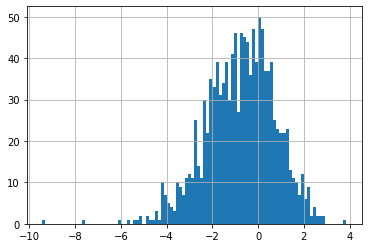

In [49]:
np.log(seller_statistic_df['z_score_in_category']).hist(bins=100)

<AxesSubplot:>

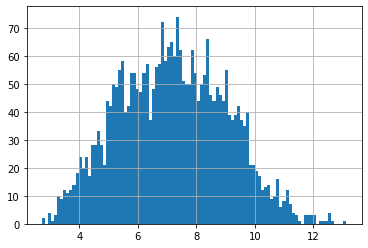

In [50]:
np.log(seller_statistic_df['payment_value']).hist(bins=100)

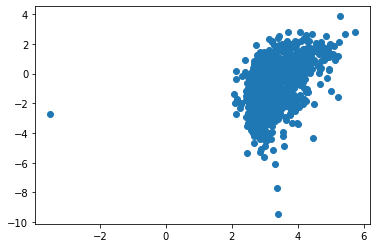

In [51]:
plt.scatter(x=np.log(seller_statistic_df['freight_value']), y=np.log(seller_statistic_df['z_score_in_category']))

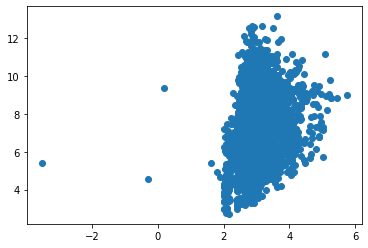

In [52]:
plt.scatter(x=np.log(seller_statistic_df['freight_value']), y=np.log(seller_statistic_df['payment_value']))

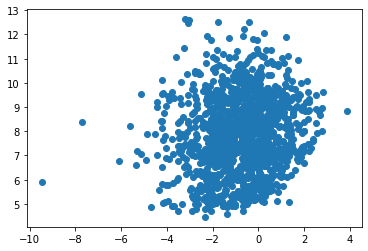

In [53]:
plt.scatter(x=np.log(seller_statistic_df['z_score_in_category']), y=np.log(seller_statistic_df['payment_value']))

### [seller별 배송 분석]

----
#### *Shipping Analysis Groupby Seller*

- 배송 소요일
- 예상 배송 소요일
- 주문-수락 소요일

In [54]:
# 배송 소요일 계산
order_df['time_to_delivered'] = order_df['order_delivered_customer_date'] - order_df['order_purchase_timestamp']
order_df['time_to_delivered'] = order_df['time_to_delivered'].dt.days
order_df['time_to_delivered'].head()

0     7
1    16
2     7
3     6
4    25
Name: time_to_delivered, dtype: int64

<AxesSubplot:>

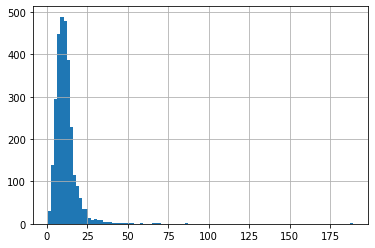

In [55]:
# seller 별 평균 배송 소요일
order_df.groupby('seller_id')['time_to_delivered'].mean().hist(bins=100)

In [56]:
# 예상 배송 소요일
order_df['time_to_estimated'] = order_df['order_estimated_delivery_date'] - order_df['order_purchase_timestamp']
order_df['time_to_estimated'] = order_df['time_to_estimated'].dt.days
order_df['time_to_estimated'].head()

0    15
1    18
2    21
3    11
4    40
Name: time_to_estimated, dtype: int64

<AxesSubplot:>

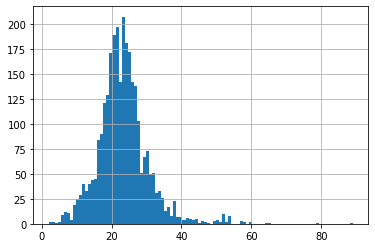

In [57]:
# seller 별 평균 예상 배송 소요일
order_df.groupby('seller_id')['time_to_estimated'].mean().hist(bins=100)

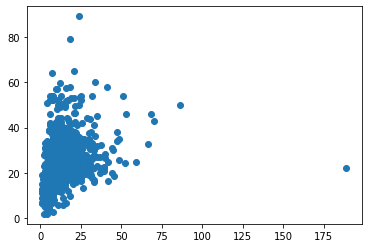

In [58]:
plt.scatter(x=order_df.groupby('seller_id')['time_to_delivered'].mean(), y=order_df.groupby('seller_id')['time_to_estimated'].mean())

In [59]:
# seller의 주문수락 소요일
order_df['time_to_accept'] = order_df['order_approved_at'] - order_df['order_purchase_timestamp']
order_df['time_to_accept'] = order_df['time_to_accept'].dt.days

<AxesSubplot:>

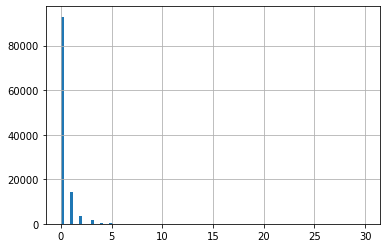

In [60]:
order_df['time_to_accept'].hist(bins=100)

In [61]:
order_df.groupby('seller_id')['time_to_accept'].mean().describe()

count    2912.000000
mean        0.261082
std         0.396060
min         0.000000
25%         0.000000
50%         0.170106
75%         0.333333
max         5.000000
Name: time_to_accept, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f830b048160>,
 'caps': [<matplotlib.lines.Line2D at 0x7f830b048880>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f830b05ad90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f830b048fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f830b03f370>],
 'means': []}

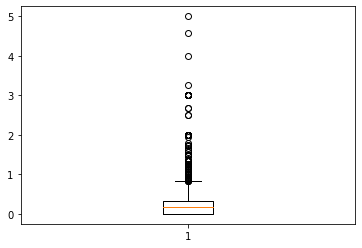

In [62]:
plt.boxplot(order_df.groupby('seller_id')['time_to_accept'].mean())

In [63]:
seller_shipping_df = order_df.groupby('seller_id')[['time_to_delivered', 'time_to_estimated', 'time_to_accept']].agg({'time_to_delivered': 'mean', 'time_to_estimated': 'mean', 'time_to_accept': 'mean'}).reset_index()
seller_shipping_df.head()

,seller_id,time_to_delivered,time_to_estimated,time_to_accept
0,0015a82c2db000af6aaaf3ae2ecb0532,10.333333,26.000000,0.333333
1,001cca7ae9ae17fb1caed9dfb1094831,12.605932,25.322034,0.279661
2,002100f778ceb8431b7a1020ff7ab48f,15.614035,23.315789,0.684211
3,004c9cd9d87a3c30c522c48c4fc07416,13.481250,25.193750,0.187500
4,00720abe85ba0859807595bbf045a33b,8.153846,20.115385,0.115385


### [seller 군집 분석]

----
#### *Seller info to one DF*

In [64]:
# seller_count_df.head()
# seller_distinct_df.head()
# seller_product_df.head()
# seller_category_df.head()
# seller_statistic_df.head()
seller_shipping_df.head()

,seller_id,time_to_delivered,time_to_estimated,time_to_accept
0,0015a82c2db000af6aaaf3ae2ecb0532,10.333333,26.000000,0.333333
1,001cca7ae9ae17fb1caed9dfb1094831,12.605932,25.322034,0.279661
2,002100f778ceb8431b7a1020ff7ab48f,15.614035,23.315789,0.684211
3,004c9cd9d87a3c30c522c48c4fc07416,13.481250,25.193750,0.187500
4,00720abe85ba0859807595bbf045a33b,8.153846,20.115385,0.115385


In [65]:
seller_df = seller_count_df.copy()
seller_df = pd.merge(seller_df, seller_product_df[['seller_id', 'best_selling_product']], on='seller_id')
seller_df = pd.merge(seller_df, seller_category_df[['seller_id', 'best_selling_category']], on='seller_id')
seller_df = pd.merge(seller_df, seller_statistic_df, on='seller_id')
seller_df = pd.merge(seller_df, seller_shipping_df, on='seller_id')

In [66]:
seller_df.head()

,seller_id,order_id,best_selling_product,best_selling_category,freight_value,z_score_in_category,payment_value,time_to_delivered,time_to_estimated,time_to_accept
0,0015a82c2db000af6aaaf3ae2ecb0532,3,"[(a2ff5a97bf95719e38ea2e3b4105bce8, 3)]","[(small_appliances, 3)]",21.020000,1.235366,2748.06,10.333333,26.000000,0.333333
1,001cca7ae9ae17fb1caed9dfb1094831,236,"[(08574b074924071f4e201e151b152b4e, 112), (e25...","[(garden_tools, 209), (construction_tools_cons...",36.983814,-0.047328,47557.95,12.605932,25.322034,0.279661
2,002100f778ceb8431b7a1020ff7ab48f,57,"[(158102fe543dbaeb84d87811bfe06d0d, 16), (414c...","[(furniture_decor, 57)]",14.217895,-0.731393,2412.64,15.614035,23.315789,0.684211
3,004c9cd9d87a3c30c522c48c4fc07416,160,"[(54af11c815f92135fb554bd9c97dd418, 13), (b2d9...","[(bed_bath_table, 160)]",19.222062,0.259749,24736.25,13.481250,25.193750,0.187500
4,00720abe85ba0859807595bbf045a33b,26,"[(0e14941c183946f60e3b86585d05f984, 5), (ae253...","[(housewares, 26)]",12.153077,-0.368756,3118.40,8.153846,20.115385,0.115385


<AxesSubplot:>

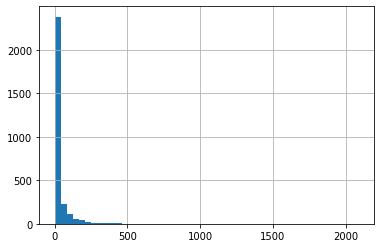

In [67]:
seller_df['order_id'].hist(bins=50)

<AxesSubplot:>

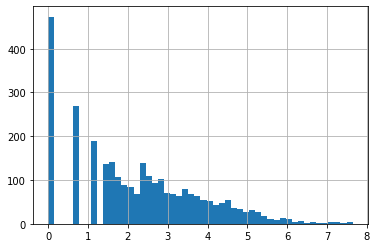

In [68]:
np.log(seller_df['order_id']).hist(bins=50)

<AxesSubplot:>

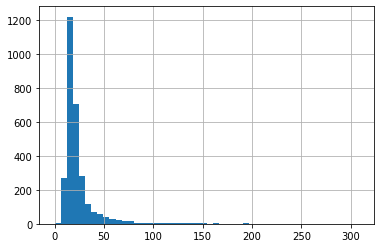

In [69]:
seller_df['freight_value'].hist(bins=50)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f831a463b80>,
 'caps': [<matplotlib.lines.Line2D at 0x7f831a4592e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f831a463910>],
 'medians': [<matplotlib.lines.Line2D at 0x7f831a459a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f831a459d90>],
 'means': []}

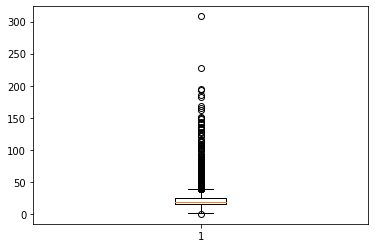

In [70]:
plt.boxplot(seller_df['freight_value'])

<AxesSubplot:>

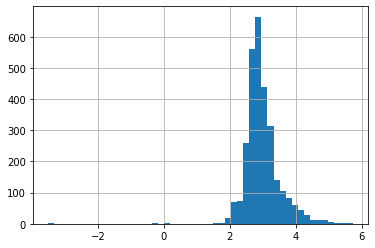

In [71]:
np.log(seller_df['freight_value']).hist(bins=50)

<AxesSubplot:>

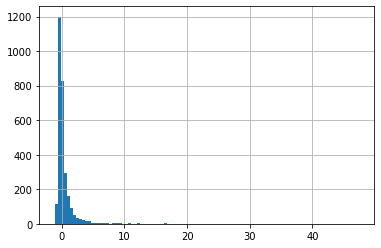

In [72]:
seller_df['z_score_in_category'].hist(bins=100)

/Users/A202009066/anaconda3/envs/nano/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

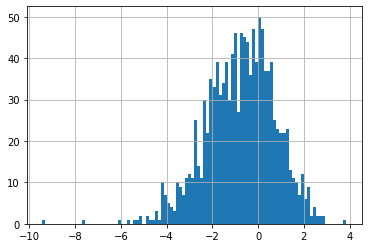

In [73]:
np.log(seller_df['z_score_in_category']).hist(bins=100)

<AxesSubplot:>

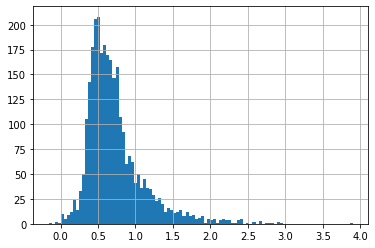

In [74]:
np.log(seller_df['z_score_in_category']+2).hist(bins=100)

<AxesSubplot:>

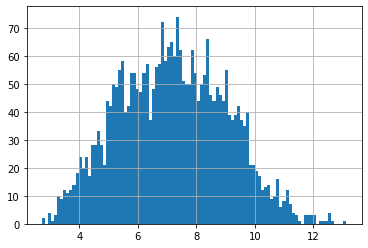

In [75]:
np.log(seller_df['payment_value']).hist(bins=100)

array([[<AxesSubplot:title={'center':'time_to_delivered'}>,
        <AxesSubplot:title={'center':'time_to_estimated'}>],
       [<AxesSubplot:title={'center':'time_to_accept'}>, <AxesSubplot:>]],
      dtype=object)

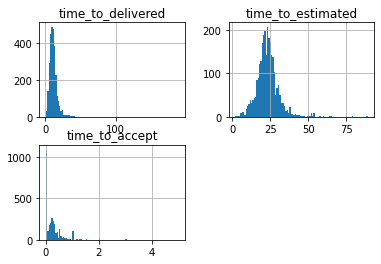

In [76]:
seller_df[['time_to_delivered', 'time_to_estimated', 'time_to_accept']].hist(bins=100)

<AxesSubplot:>

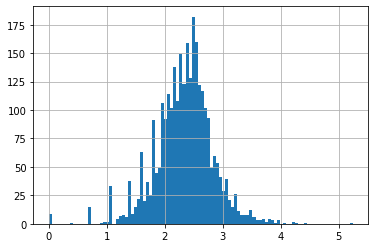

In [77]:
np.log(seller_df['time_to_delivered']).hist(bins=100)

<AxesSubplot:>

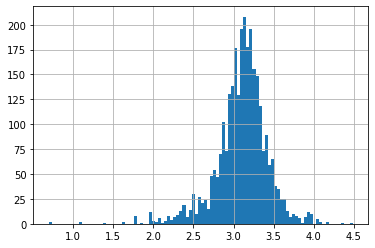

In [78]:
np.log(seller_df['time_to_estimated']).hist(bins=100)

<AxesSubplot:>

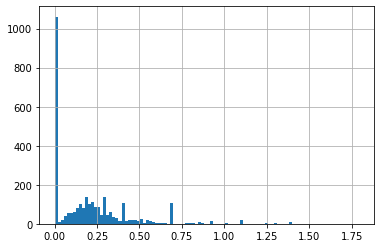

In [79]:
np.log(seller_df['time_to_accept']+1).hist(bins=100)

----
#### *Apply Feature Engineering*

In [80]:
def log_normalize(df, columns):
    for column in columns:
        df[column] = np.log(df[column]+2)
    return df


def min_max_scaling(df, columns):
    for column in columns:
        df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
    return df

In [81]:
seller_df = log_normalize(seller_df, ['order_id', 'freight_value', 'z_score_in_category', 'payment_value', 'time_to_delivered', 'time_to_estimated'])

In [82]:
seller_df = log_normalize(seller_df, ['order_id', 'freight_value', 'z_score_in_category', 'payment_value', 'time_to_delivered', 'time_to_estimated', 'time_to_accept'])

In [83]:
seller_df.head()

,seller_id,order_id,best_selling_product,best_selling_category,freight_value,z_score_in_category,payment_value,time_to_delivered,time_to_estimated,time_to_accept
0,0015a82c2db000af6aaaf3ae2ecb0532,1.283552,"[(a2ff5a97bf95719e38ea2e3b4105bce8, 3)]","[(small_appliances, 3)]",1.636345,1.155037,2.294490,1.506808,1.673765,0.847298
1,001cca7ae9ae17fb1caed9dfb1094831,2.011199,"[(08574b074924071f4e201e151b152b4e, 112), (e25...","[(garden_tools, 209), (construction_tools_cons...",1.733980,0.981778,2.547079,1.543603,1.669157,0.824027
2,002100f778ceb8431b7a1020ff7ab48f,1.804600,"[(158102fe543dbaeb84d87811bfe06d0d, 16), (414c...","[(furniture_decor, 57)]",1.565719,0.805547,2.281291,1.582826,1.654684,0.987387
3,004c9cd9d87a3c30c522c48c4fc07416,1.958346,"[(54af11c815f92135fb554bd9c97dd418, 13), (b2d9...","[(bed_bath_table, 160)]",1.620386,1.035052,2.494536,1.555959,1.668270,0.782759
4,00720abe85ba0859807595bbf045a33b,1.673765,"[(0e14941c183946f60e3b86585d05f984, 5), (ae253...","[(housewares, 26)]",1.536853,0.912019,2.307146,1.462758,1.628510,0.749237


----
#### *K-means Clustering*

In [84]:
kmeans_df = seller_df[['order_id', 'freight_value', 'z_score_in_category', 'payment_value', 'time_to_delivered', 'time_to_estimated', 'time_to_accept']]

k: 1 | cost: 33.91660615845516
k: 2 | cost: 17.848253011654414
k: 3 | cost: 12.358307241816046
k: 4 | cost: 9.761374947287326
k: 5 | cost: 8.412107685007372
k: 6 | cost: 7.444867441706731
k: 7 | cost: 6.680673111126949
k: 8 | cost: 5.9711149091782865
k: 9 | cost: 5.391076025118543


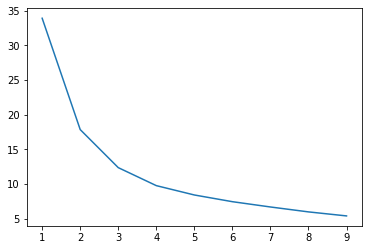

In [85]:
from sklearn.cluster import KMeans

# K-means train & Elbow method
X = kmeans_df[['time_to_delivered', 'time_to_estimated']]

k_list = []
cost_list = []
for k in range (1, 10):
    kmeans = KMeans(n_clusters=k).fit(X)
    interia = kmeans.inertia_
    print ("k:", k, "| cost:", interia)
    k_list.append(k)
    cost_list.append(interia)
    
plt.plot(k_list, cost_list)

In [86]:
# selected by elbow method
kmeans = KMeans(n_clusters=3).fit(X)
cluster_num = kmeans.predict(X)
cluster = pd.Series(cluster_num)
kmeans_df['cluster_num'] = cluster.values
kmeans_df.head()

/Users/A202009066/anaconda3/envs/nano/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,order_id,freight_value,z_score_in_category,payment_value,time_to_delivered,time_to_estimated,time_to_accept,cluster_num
0,1.283552,1.636345,1.155037,2.294490,1.506808,1.673765,0.847298,1
1,2.011199,1.733980,0.981778,2.547079,1.543603,1.669157,0.824027,1
2,1.804600,1.565719,0.805547,2.281291,1.582826,1.654684,0.987387,0
3,1.958346,1.620386,1.035052,2.494536,1.555959,1.668270,0.782759,0
4,1.673765,1.536853,0.912019,2.307146,1.462758,1.628510,0.749237,1


In [87]:
print(kmeans_df['cluster_num'].value_counts())

1    1549
0     862
2     501
Name: cluster_num, dtype: int64


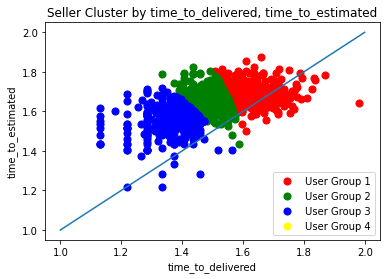

In [88]:
# Visualization
plt.scatter(kmeans_df[kmeans_df['cluster_num'] == 0]['time_to_delivered'], 
            kmeans_df[kmeans_df['cluster_num'] == 0]['time_to_estimated'], 
            s = 50, c = 'red', label = 'User Group 1')
plt.scatter(kmeans_df[kmeans_df['cluster_num'] == 1]['time_to_delivered'], 
            kmeans_df[kmeans_df['cluster_num'] == 1]['time_to_estimated'], 
            s = 50, c = 'green', label = 'User Group 2')
plt.scatter(kmeans_df[kmeans_df['cluster_num'] == 2]['time_to_delivered'], 
            kmeans_df[kmeans_df['cluster_num'] == 2]['time_to_estimated'], 
            s = 50, c = 'blue', label = 'User Group 3')
plt.scatter(kmeans_df[kmeans_df['cluster_num'] == 3]['time_to_delivered'], 
            kmeans_df[kmeans_df['cluster_num'] == 3]['time_to_estimated'], 
            s = 50, c = 'yellow', label = 'User Group 4')
plt.plot([1.0, 2.0], [1.0, 2.0])
plt.title('Seller Cluster by time_to_delivered, time_to_estimated')
plt.xlabel('time_to_delivered')
plt.ylabel('time_to_estimated')
plt.legend()
plt.show()

k: 1 | cost: 72.7106515456227
k: 2 | cost: 35.18598929675196
k: 3 | cost: 24.002155042418504
k: 4 | cost: 19.348369686969423
k: 5 | cost: 16.209444852137754
k: 6 | cost: 14.013016999821511
k: 7 | cost: 12.275072836258405
k: 8 | cost: 11.033830525779114
k: 9 | cost: 9.903594596014408


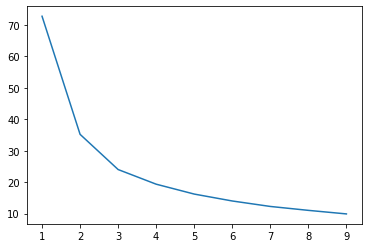

In [89]:
from sklearn.cluster import KMeans

# K-means train & Elbow method
X = kmeans_df[['freight_value', 'z_score_in_category']]

k_list = []
cost_list = []
for k in range (1, 10):
    kmeans = KMeans(n_clusters=k).fit(X)
    interia = kmeans.inertia_
    print ("k:", k, "| cost:", interia)
    k_list.append(k)
    cost_list.append(interia)
    
plt.plot(k_list, cost_list)

In [90]:
# selected by elbow method
kmeans = KMeans(n_clusters=3).fit(X)
cluster_num = kmeans.predict(X)
cluster = pd.Series(cluster_num)
kmeans_df['cluster_num'] = cluster.values
kmeans_df.head()

/Users/A202009066/anaconda3/envs/nano/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,order_id,freight_value,z_score_in_category,payment_value,time_to_delivered,time_to_estimated,time_to_accept,cluster_num
0,1.283552,1.636345,1.155037,2.294490,1.506808,1.673765,0.847298,1
1,2.011199,1.733980,0.981778,2.547079,1.543603,1.669157,0.824027,1
2,1.804600,1.565719,0.805547,2.281291,1.582826,1.654684,0.987387,0
3,1.958346,1.620386,1.035052,2.494536,1.555959,1.668270,0.782759,1
4,1.673765,1.536853,0.912019,2.307146,1.462758,1.628510,0.749237,0


In [91]:
print(kmeans_df['cluster_num'].value_counts())

0    1499
1    1122
2     291
Name: cluster_num, dtype: int64


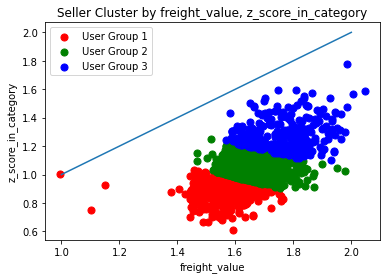

In [92]:
# Visualization
plt.scatter(kmeans_df[kmeans_df['cluster_num'] == 0]['freight_value'], 
            kmeans_df[kmeans_df['cluster_num'] == 0]['z_score_in_category'], 
            s = 50, c = 'red', label = 'User Group 1')
plt.scatter(kmeans_df[kmeans_df['cluster_num'] == 1]['freight_value'], 
            kmeans_df[kmeans_df['cluster_num'] == 1]['z_score_in_category'], 
            s = 50, c = 'green', label = 'User Group 2')
plt.scatter(kmeans_df[kmeans_df['cluster_num'] == 2]['freight_value'], 
            kmeans_df[kmeans_df['cluster_num'] == 2]['z_score_in_category'], 
            s = 50, c = 'blue', label = 'User Group 3')
plt.plot([1.0, 2.0], [1.0, 2.0])
plt.title('Seller Cluster by freight_value, z_score_in_category')
plt.xlabel('freight_value')
plt.ylabel('z_score_in_category')
plt.legend()
plt.show()

----
#### *참고 : t-SNE 시각화*

In [93]:
from sklearn.manifold import TSNE

model = TSNE(learning_rate=300)
transformed = model.fit_transform(kmeans_df)

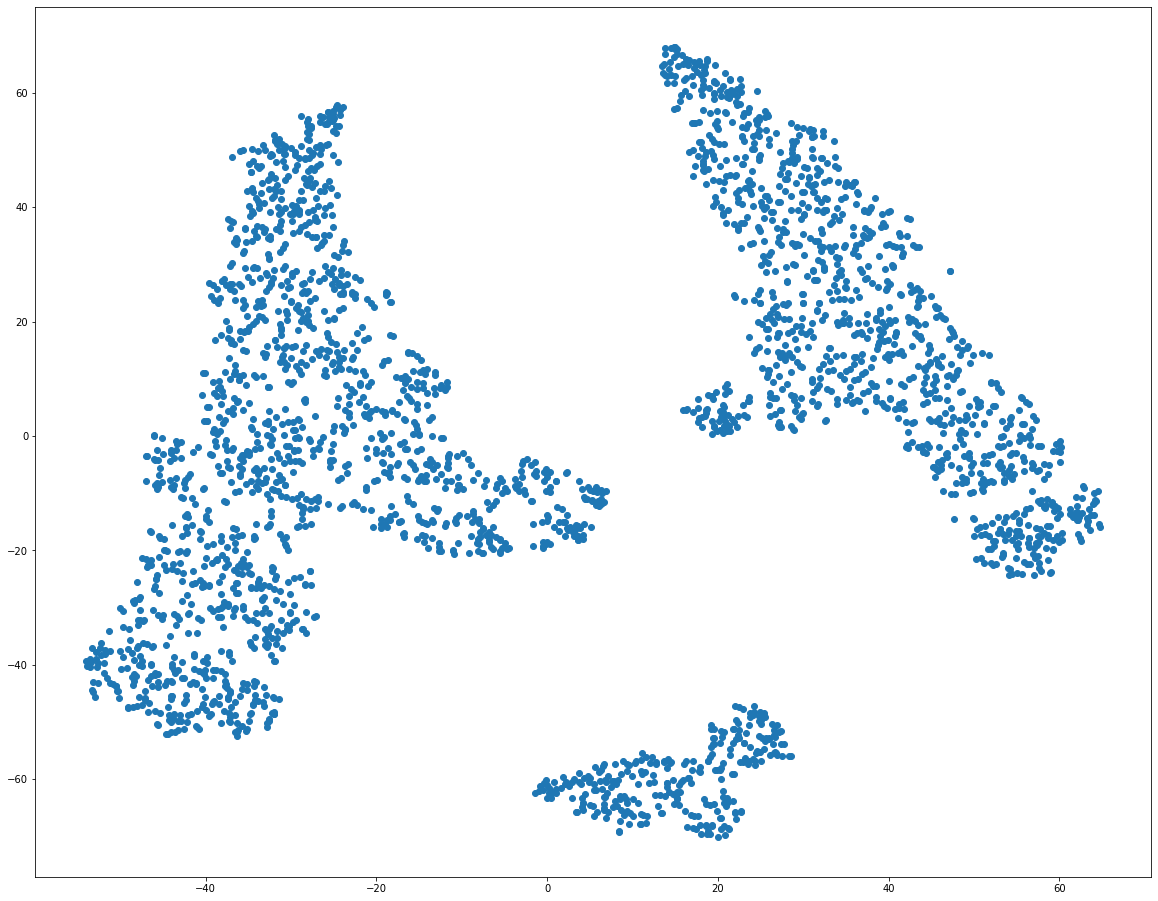

In [94]:
plt.rcParams['figure.figsize'] = [20, 16]
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys)
plt.show()

----
# 3. 분석 결과 함수화 & 대시보드
### [판매량 파이차트]

In [95]:
seller_product_df.head()

,seller_id,product_id,sell_count_dict,best_selling_product
0,0015a82c2db000af6aaaf3ae2ecb0532,"[a2ff5a97bf95719e38ea2e3b4105bce8, a2ff5a97bf9...",{'a2ff5a97bf95719e38ea2e3b4105bce8': 3},"[(a2ff5a97bf95719e38ea2e3b4105bce8, 3)]"
1,001cca7ae9ae17fb1caed9dfb1094831,"[08574b074924071f4e201e151b152b4e, 4f3b83b83f7...","{'08574b074924071f4e201e151b152b4e': 112, '4f3...","[(08574b074924071f4e201e151b152b4e, 112), (e25..."
2,002100f778ceb8431b7a1020ff7ab48f,"[62c2b9bd44500d0305b1e50e2c9bd34d, cb790fa02cc...","{'62c2b9bd44500d0305b1e50e2c9bd34d': 1, 'cb790...","[(158102fe543dbaeb84d87811bfe06d0d, 16), (414c..."
3,004c9cd9d87a3c30c522c48c4fc07416,"[b2d98b6f547c14e29a9e72b8e630d936, daf9301b3e3...","{'b2d98b6f547c14e29a9e72b8e630d936': 7, 'daf93...","[(54af11c815f92135fb554bd9c97dd418, 13), (b2d9..."
4,00720abe85ba0859807595bbf045a33b,"[2d9ff06c8870a518f5f6909774e140fb, 2d9ff06c887...","{'2d9ff06c8870a518f5f6909774e140fb': 2, 'cb046...","[(0e14941c183946f60e3b86585d05f984, 5), (ae253..."


In [96]:
seller_product_df['sell_count_dict'][1]

Counter({'08574b074924071f4e201e151b152b4e': 112,
         '4f3b83b83f7fb280fca4f90ba502f50e': 1,
         '547b95702aec86f05ac37e61d164891c': 17,
         'e251ebd2858be1aa7d9b2087a6992580': 47,
         '86b22a03cb72239dd53996a67df35c63': 6,
         '98a8c2fa16d7239c606640f5555768e4': 29,
         '0da9ffd92214425d880de3f94e74ce39': 17,
         '21fecd254a3103704126b28478ea7980': 3,
         '4d7fee7877228c1497477ae53d97c214': 2,
         '6d15a14a5c04e3ef315ab136bd824d72': 1,
         'd32f22e03fb01595aa10383f4364d303': 1})

In [97]:
sell_count_dict = seller_product_df['sell_count_dict'][1]

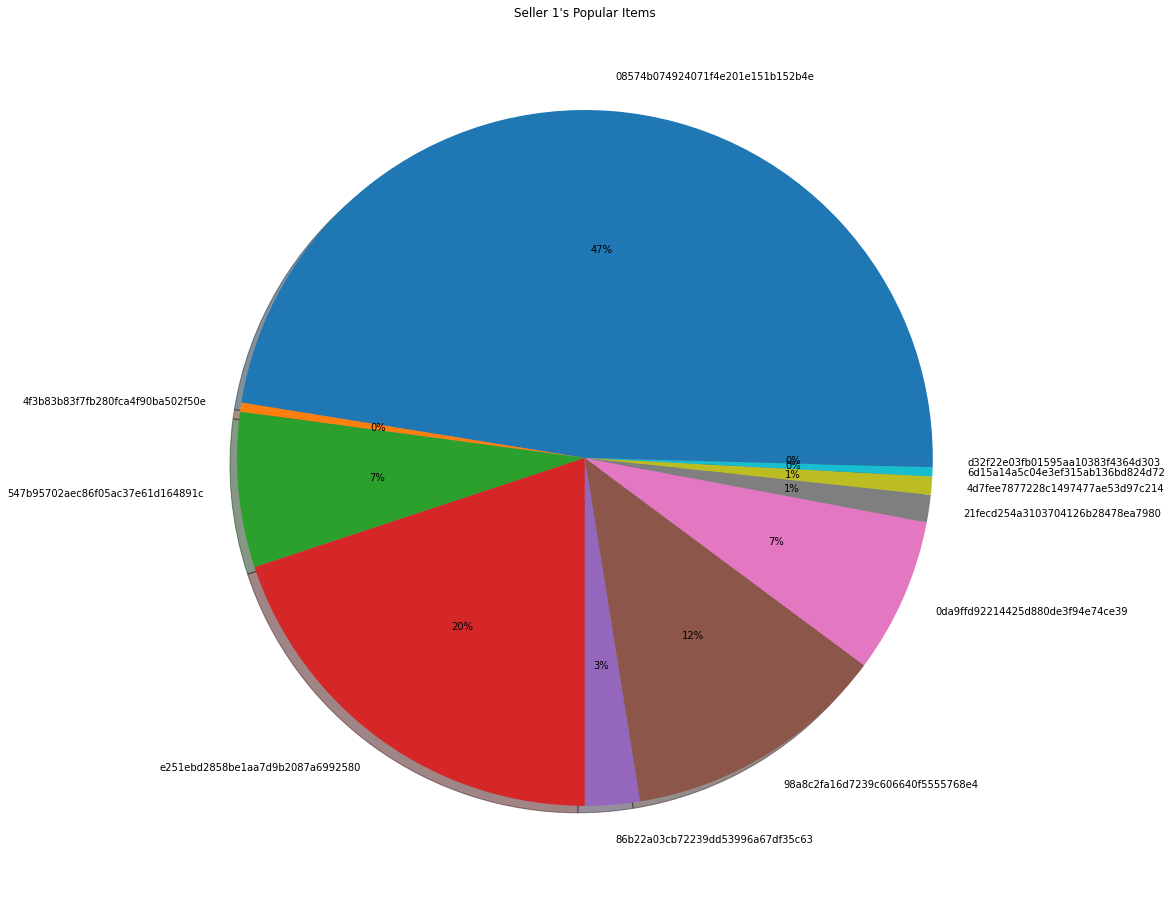

In [98]:
labels = list(sell_count_dict.keys())
fracs1 = list(sell_count_dict.values())

plt.pie(fracs1, labels=labels, autopct='%.0f%%', shadow=True)
plt.title('Seller 1\'s Popular Items')
plt.show()

In [99]:
def get_seller_pie_chart(df, seller_id):
    sell_count_dict = df[df['seller_id']==seller_id]['sell_count_dict'].values[0]
    labels = list(sell_count_dict.keys())
    fracs1 = list(sell_count_dict.values())

    plt.pie(fracs1, labels=labels, autopct='%.0f%%', shadow=True)
    plt.title('Seller 1\'s Popular Items')
    plt.show()

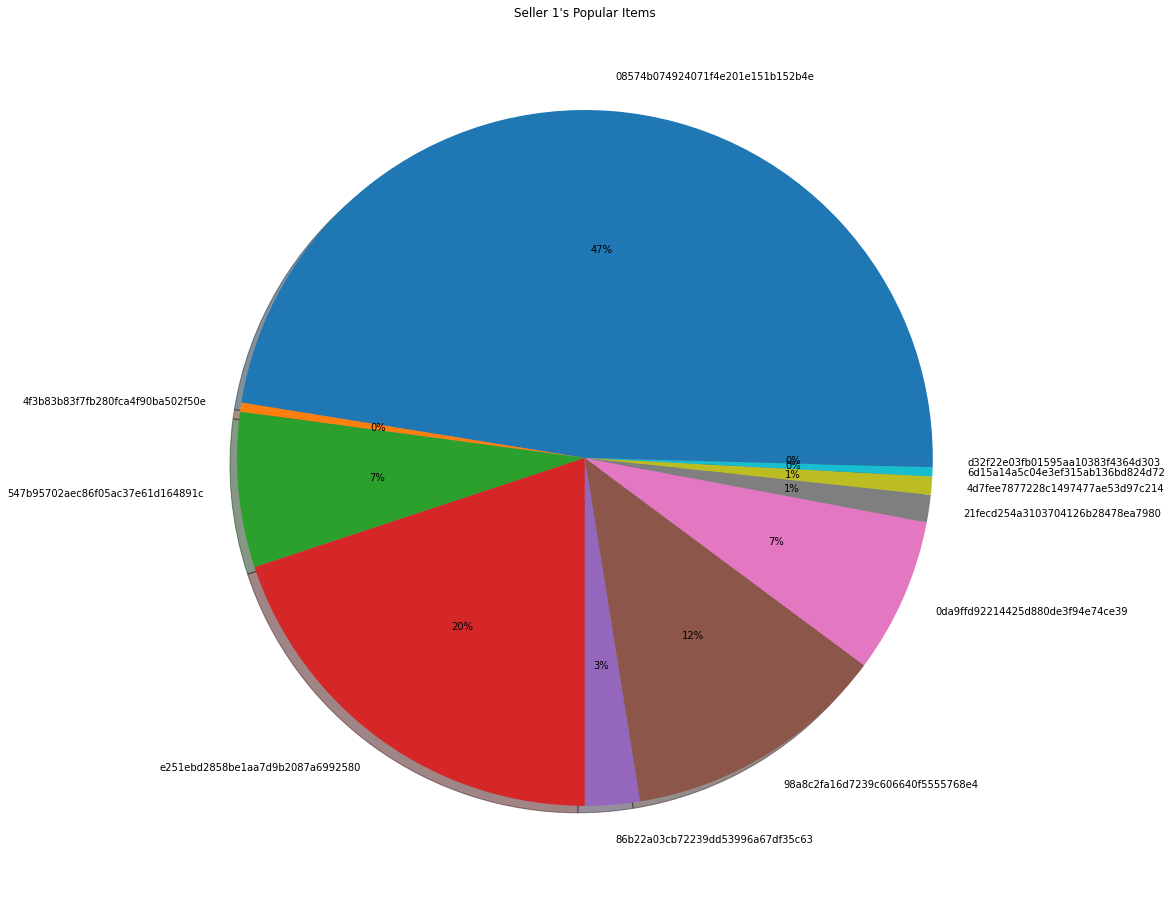

In [100]:
get_seller_pie_chart(seller_product_df, '001cca7ae9ae17fb1caed9dfb1094831')

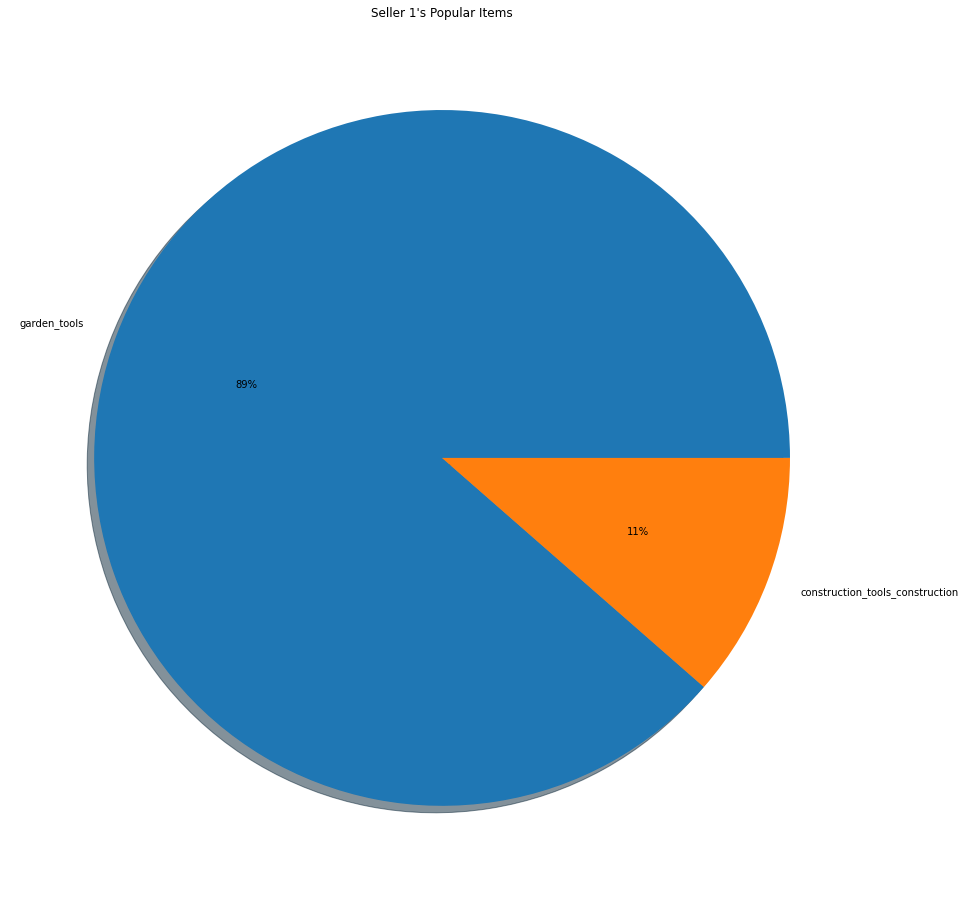

In [101]:
get_seller_pie_chart(seller_category_df, '001cca7ae9ae17fb1caed9dfb1094831')

----
### [상품별 리뷰 워드클라우드]

In [102]:
olist_order_reviews_dataset = pd.read_csv(data_dir + "olist_order_reviews_dataset.csv")
olist_order_reviews_dataset.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [103]:
olist_order_reviews_dataset = pd.merge(olist_order_reviews_dataset, order_df.groupby('order_id').agg({'product_id': 'first'}).reset_index()[['order_id', 'product_id']], on='order_id')

In [104]:
olist_order_reviews_dataset.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_id
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,fd25ab760bfbba13c198fa3b4f1a0cd3
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,be0dbdc3d67d55727a65d4cd696ca73c
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,d1c427060a0f73f6b889a5c7c61f2ac4
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,52c80cedd4e90108bf4fa6a206ef6b03
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,3880d25d502b15b1de6fddc42ad1d67a


In [105]:
olist_order_reviews_dataset = olist_order_reviews_dataset[['product_id', 'review_score', 'review_comment_title', 'review_comment_message']]
olist_order_reviews_dataset = olist_order_reviews_dataset.dropna(how='all', subset=['review_comment_title', 'review_comment_message'])
olist_order_reviews_dataset = olist_order_reviews_dataset.fillna('')
olist_order_reviews_dataset['text'] = olist_order_reviews_dataset[['review_comment_title', 'review_comment_message']].apply(lambda x : '{}{}'.format(x[0], x[1]), axis=1)
olist_order_reviews_dataset = olist_order_reviews_dataset[['product_id', 'review_score', 'text']]
olist_order_reviews_dataset.head()

,product_id,review_score,text
3,52c80cedd4e90108bf4fa6a206ef6b03,5,Recebi bem antes do prazo estipulado.
4,3880d25d502b15b1de6fddc42ad1d67a,5,Parabéns lojas lannister adorei comprar pela I...
9,61a4100ccd6d9c4c808a1fd954ddb8ad,4,recomendoaparelho eficiente. no site a marca d...
12,acffe5d7cd56e6b564cf6841486644ff,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n"
15,6871a3c157d6f51697e887f3c3598479,5,"Super recomendoVendedor confiável, produto ok ..."


In [106]:
olist_order_reviews_dataset.shape

(40744, 3)

In [107]:
olist_order_reviews_dataset.isnull().sum()

product_id      0
review_score    0
text            0
dtype: int64

In [108]:
import random
import pytagcloud
import webbrowser

from nltk.tokenize import RegexpTokenizer
from collections import Counter
from googletrans import Translator

# portuguese to english
trans = Translator()

tokenizer = RegexpTokenizer(r'\w+')
def get_word_cloud(product_id):
    text = " ".join(olist_order_reviews_dataset[olist_order_reviews_dataset['product_id']==product_id]['text'].values.tolist())
    tokens = tokenizer.tokenize(text)
    count = Counter(tokens).most_common(40)
    ko_count = []
    for tup in count:
        ko_count.append((trans.translate(tup[0], src='pt', dest='ko').text, tup[1]))
    taglist = pytagcloud.make_tags(ko_count, maxsize=80)
    pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size=(900, 600), fontname='NanumGothic', rectangular=False)

pygame 2.0.1 (SDL 2.0.14, Python 3.8.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [109]:
get_word_cloud('52c80cedd4e90108bf4fa6a206ef6b03')

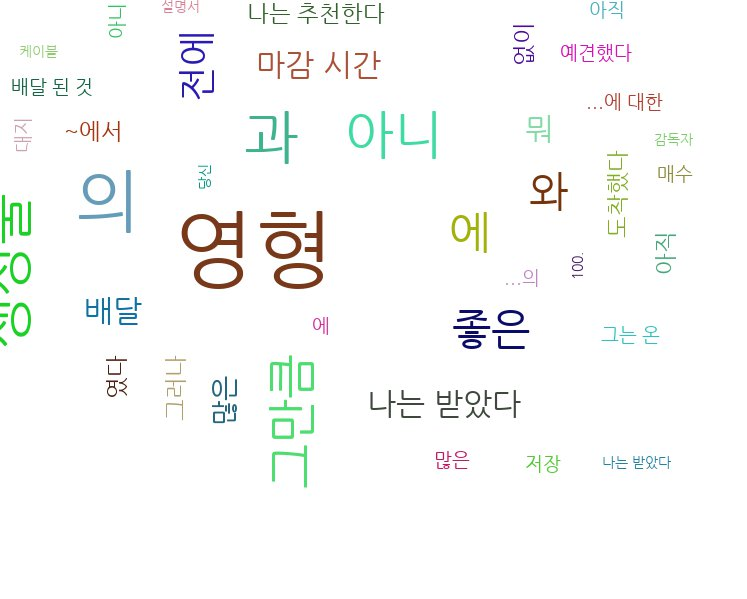

In [110]:
# 생성한 이미지를 주피터 노트북상에서 출력합니다
from IPython.display import Image
Image(filename='wordcloud.jpg')